# 1. Importing Libraries

In [15]:
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from keras.layers import Input, Lambda
from sklearn.model_selection import train_test_split

import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Importing Dataset

In [2]:
training_data = pd.read_csv("Downloads/fashionmnist/fashion-mnist_train.csv")
testing_data = pd.read_csv("Downloads/fashionmnist/fashion-mnist_test.csv")

In [3]:
print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)

Training Data Shape: (60000, 785)
Testing Data Shape: (10000, 785)


# 3. Preparing Data For Neural Network

In [4]:
# Labeling class for the simplication.
numbers_to_class = {  0:'Tee',
                      1:'Trouser/Jeans',
                      2:'Pullover',
                      3:'Party Dress',
                      4:'Jacket/Coat',
                      5:'Ladies Heels',
                      6:'Shirt',
                      7:'Sneaker',
                      8:'Ladies Bag',
                      9:'Ankle Shoes'}

In [5]:
#Segregating the target column and predictors columns

training_predicters = training_data.drop(['label'], axis=1).values
training_labels = training_data['label'].values
print("Shape of Training Predictors :", training_predicters.shape)
print("Shape of Training Lables :", training_labels.shape)


testing_predicters = testing_data.drop(['label'], axis=1).values
testing_labels = testing_data['label'].values
print("Shape of Testing Predictors :", testing_predicters.shape)
print("Shape of Testing Labels:", testing_labels.shape)

Shape of Training Predictors : (60000, 784)
Shape of Training Lables : (60000,)
Shape of Testing Predictors : (10000, 784)
Shape of Testing Labels: (10000,)


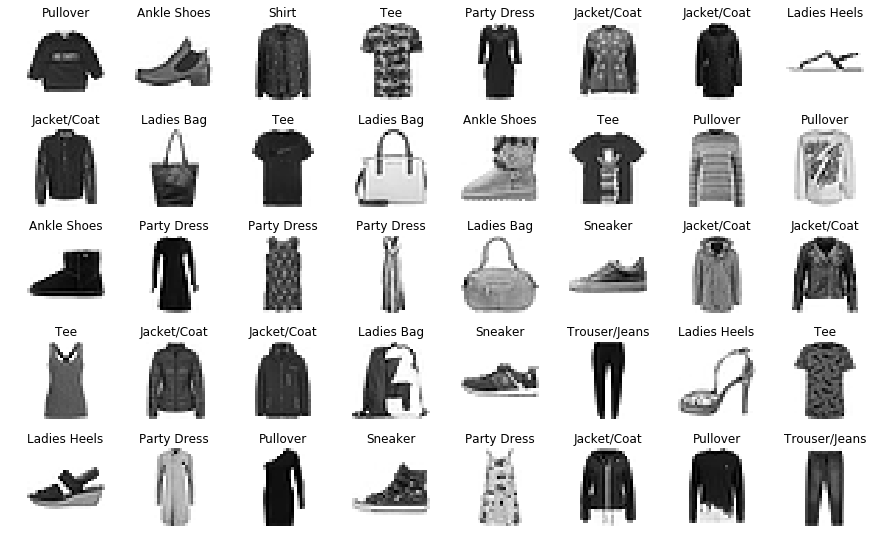

In [6]:
# Visualizing the data with labels for better understanding.
plt.figure(figsize=(15,10))
for i in range(40):  
    plt.subplot(5, 8, i+1)
    plt.imshow(training_predicters[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("%s" % numbers_to_class[training_labels[i]],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=-0.1)
plt.show()

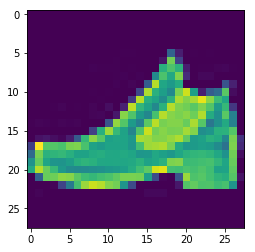

In [7]:
plt.imshow(training_predicters[1].reshape(28,28))

In [8]:
# Resizing the shape to (28,28,1) initally this dataset contains the shape as (784,)
x_train = training_predicters.reshape(-1, 28, 28,1)

# Using one-hot encoding to predict labels.
y_train = keras.utils.to_categorical(training_labels, 10)

x_train = x_train.astype('float32')
x_train /= 255

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [9]:
# Testing Dataset
x_test = testing_predicters.reshape(-1, 28, 28,1)

y_test = keras.utils.to_categorical(testing_labels, 10)

x_test = x_test.astype('float32')
x_test /= 255

print(x_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


# 4. Training Convolutinal Neural Network

In [10]:
# Building Model with 2 Convolutional Networks.

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu',input_shape=(2,)))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [67]:
# Fitting the model with the above resized data
history = model.fit(x_train,y_train,batch_size=300,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3353 - acc: 0.8813
Epoch 2/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3164 - acc: 0.8880
Epoch 3/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3046 - acc: 0.8914
Epoch 4/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2937 - acc: 0.8964
Epoch 5/5
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2820 - acc: 0.8999


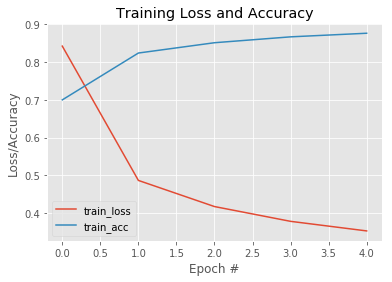

In [13]:
# Plotting the accuracy and loss.
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# 5. Predicting With Model 

In [16]:
predicted_values = model.predict(x_test[:5000])
predicted_labels = []
for i in range(5000):
    predicted_label = np.argmax(predicted_values[i])
    predicted_labels.append(predicted_label)

In [18]:
final_result = pd.DataFrame(testing_labels[:5000], columns=['Actual'])

final_result['Predicted'] = pred_dev_labels
final_result['Error'] = final_result['Actual'] - final_result['Predicted']
errors = final_result[final_result['Error'] != 0]
error_list = errors.index

print('Number of errors is :', len(errors))

Number of errors is : 628


In [19]:
accuracy = len(final_result[final_result["Error"] == 0])/len(final_result) * 100
print("Accuracy of the model in % is :", np.round(accuracy,2))

Accuracy of the model in % is : 87.44


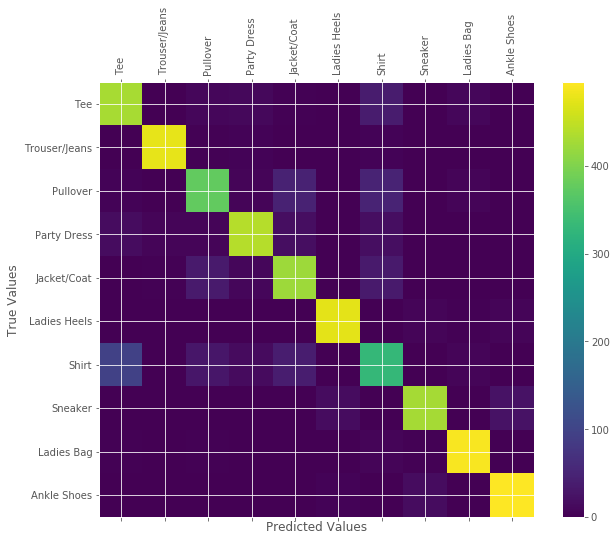

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(final_result['Actual'], final_result['Predicted'])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xticks(range(0,10,1), rotation=90)
plt.yticks(range(0,10,1))

ax.set_xticklabels(list(numbers_to_class.values()))
ax.set_yticklabels(list(numbers_to_class.values()))
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()